Estimated Position and Transmission Time:
x1 (m)			x2 (m)			tau (ns)
1998.3310147851723	-1506.2516797641383	2986.8521355448984


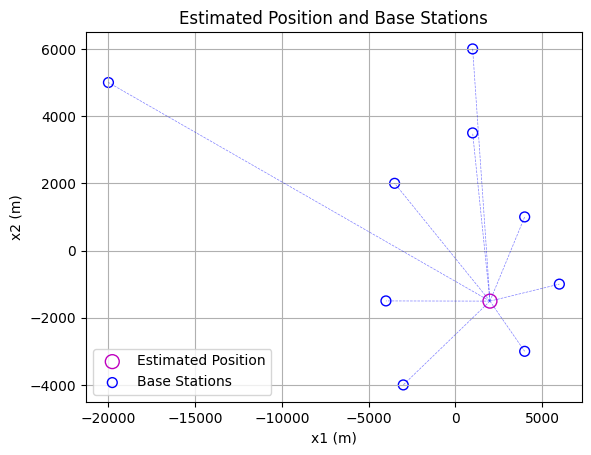

In [21]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


c = 0.3  # speed of light in m/ns

base_stations = np.array([
    [-20000, 1000, -3000, 4000, -3500, 1000, 4000, -4000, 6000],
    [5000, 3500, -4000, 1000, 2000, 6000, -3000, -1500, -1000]
])
measured_times = np.array([79445, 20009, 21622, 13683, 24709, 28223, 11293, 22990, 16446])

def theoretical_times(theta, base_stations):
    x1, x2, tau = theta
    distances = np.sqrt((base_stations[0] - x1)**2 + (base_stations[1] - x2)**2)
    return distances / c + tau


# The objective function to be minimized (the residuals)
def objective_function(theta, base_stations, measured_times):
    return theoretical_times(theta, base_stations) - measured_times


initial_vector = [0, 0, 0]  # Assuming the cell phone is somewhere in the middle of the area and tau is close to zero
result = least_squares(objective_function, initial_vector, args=(base_stations, measured_times))  # Perform the optimization

print("Estimated Position and Transmission Time:")
print("x1 (m)\t\t\tx2 (m)\t\t\ttau (ns)")
print(*result.x, sep='\t')

# Plot the Estimated Position and all base stations
plt.figure()
plt.scatter(result.x[0], result.x[1], label='Estimated Position', edgecolors='m', marker='o', facecolors='none', s=100)
plt.scatter(base_stations[0], base_stations[1], label='Base Stations', edgecolors='b', marker='o', facecolors='none', s=50)
for i in range(base_stations.shape[1]):
    plt.plot([result.x[0], base_stations[0, i]], [result.x[1], base_stations[1, i]], 'b--', alpha=0.5, lw=0.5)
plt.legend()
plt.xlabel('x1 (m)')
plt.ylabel('x2 (m)')
plt.title('Estimated Position and Base Stations')
plt.grid()
plt.show()
